In [72]:
import os
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier

In [1]:
#select files from your local machine to upload
uploaded = files.upload()

Saving heart.csv to heart.csv


In [6]:
# List files in the current working directory
os.listdir('/content')


['.config', 'heart.csv', 'sample_data']

In [7]:
# Load the CSV file into dataframe
df = pd.read_csv('/content/heart.csv')
# Display the first few rows of the DataFrame
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Check for missing values
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [10]:
# Display basic statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['RestingBP'].plot(kind='hist', bins=20, title='RestingBP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Cholesterol'].plot(kind='hist', bins=20, title='Cholesterol')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['FastingBS'].plot(kind='hist', bins=20, title='FastingBS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Age', y='RestingBP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='RestingBP', y='Cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Cholesterol', y='FastingBS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='FastingBS', y='MaxHR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['RestingBP'].plot(kind='line', figsize=(8, 4), title='RestingBP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['FastingBS'].plot(kind='line', figsize=(8, 4), title='FastingBS')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='RestingBP', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Cholesterol', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='FastingBS', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

EDA

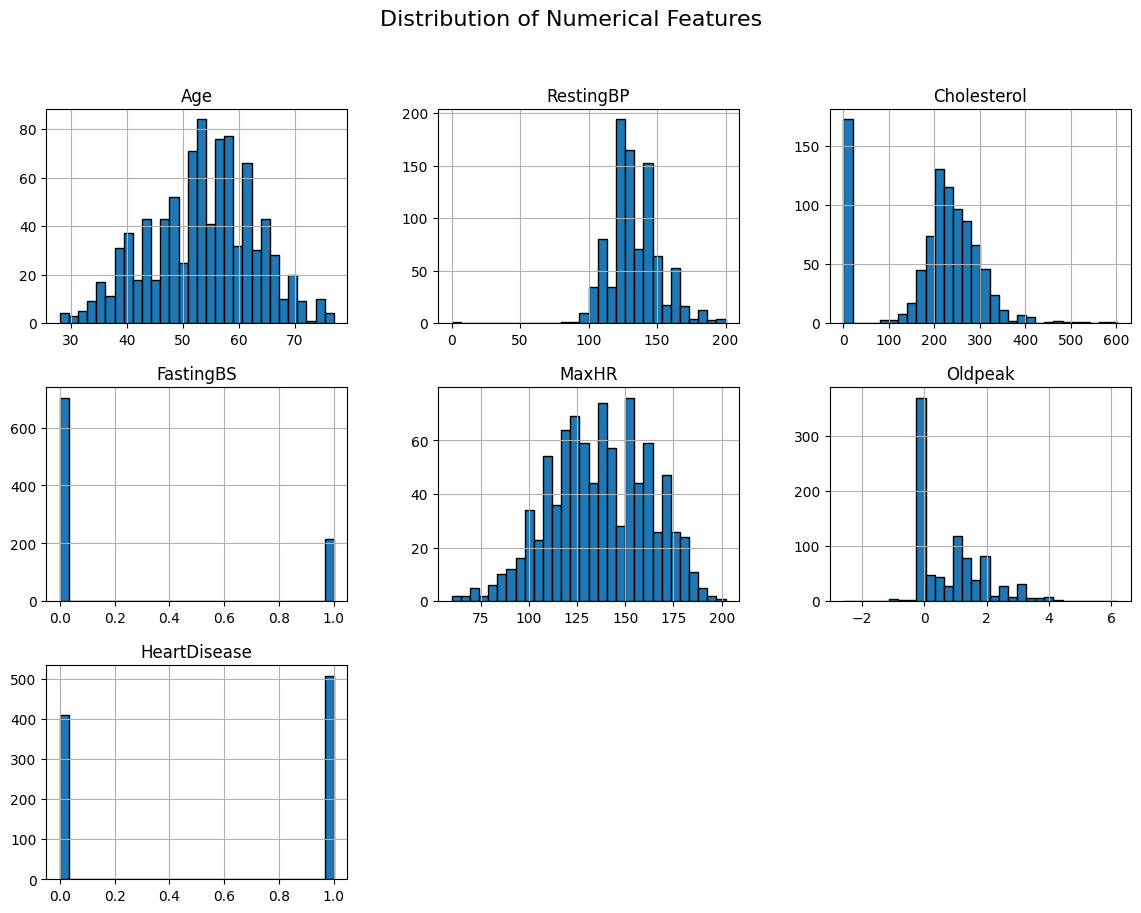

In [13]:
df.hist(figsize=(14, 10), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', size=16)
plt.show()

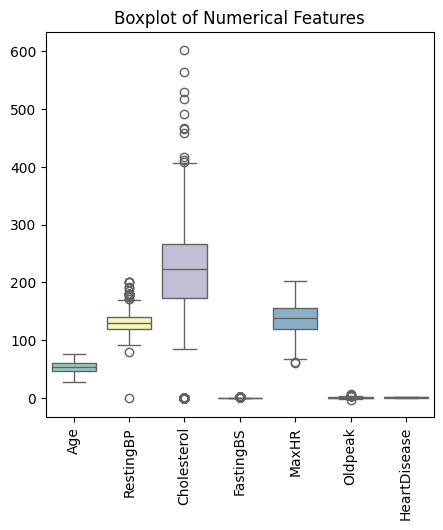

In [16]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=df, palette="Set3")
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

<ipython-input-18-00040c72c6b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
<ipython-input-18-00040c72c6b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
<ipython-input-18-00040c72c6b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2")
<ipython-input-18-00040c72c6b9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

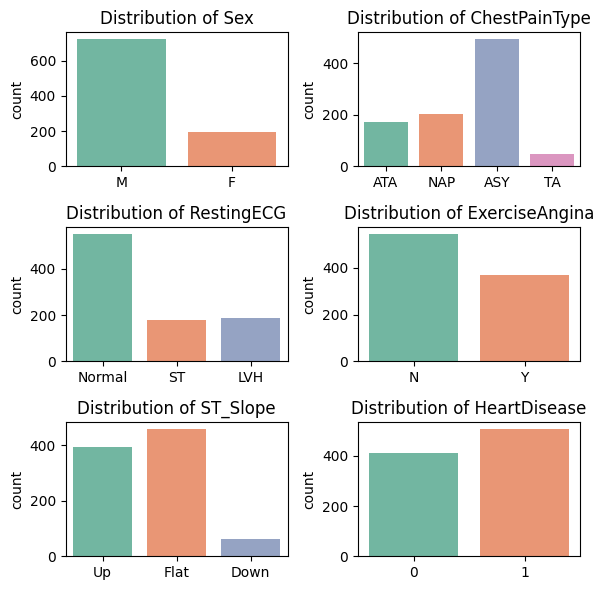

In [18]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
plt.figure(figsize=(6, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=col, data=df, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()


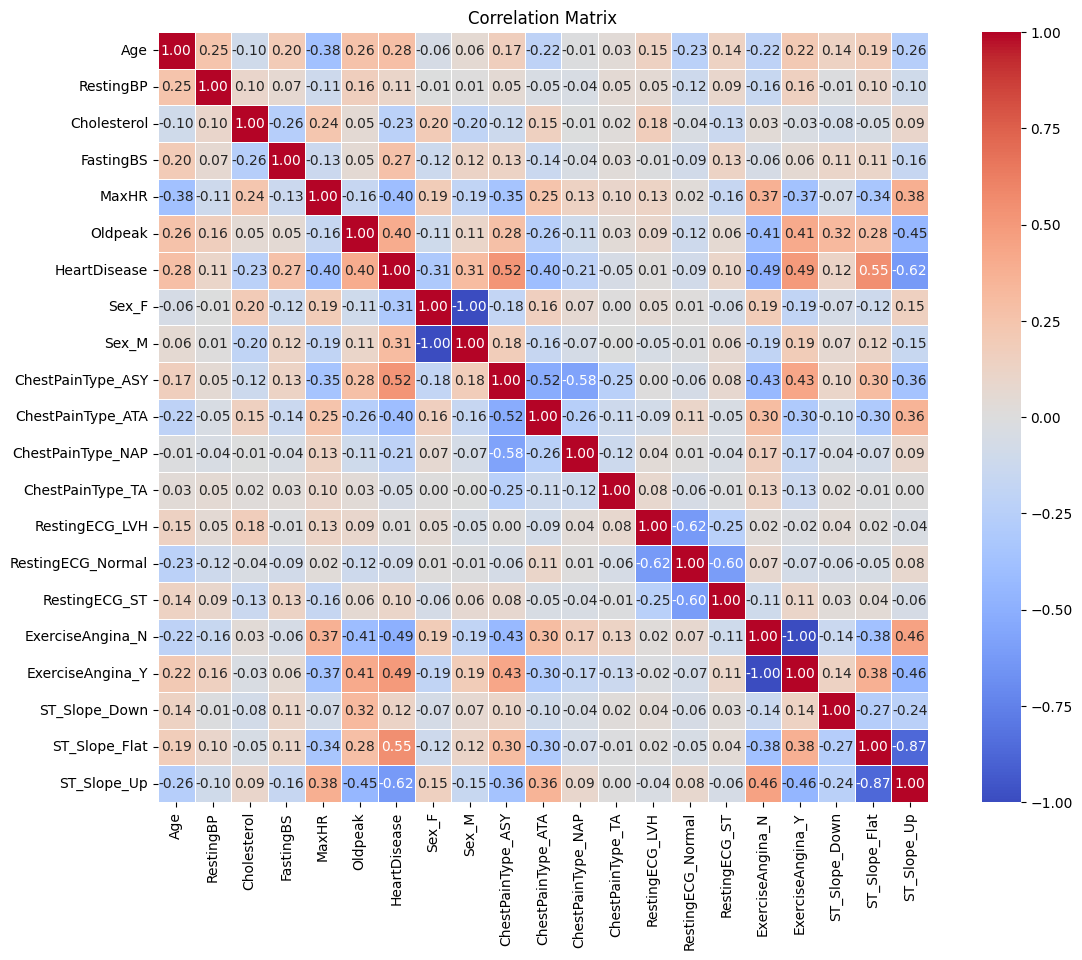

In [20]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
# Now, calculate the correlation matrix
corr = df_encoded.corr()
# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



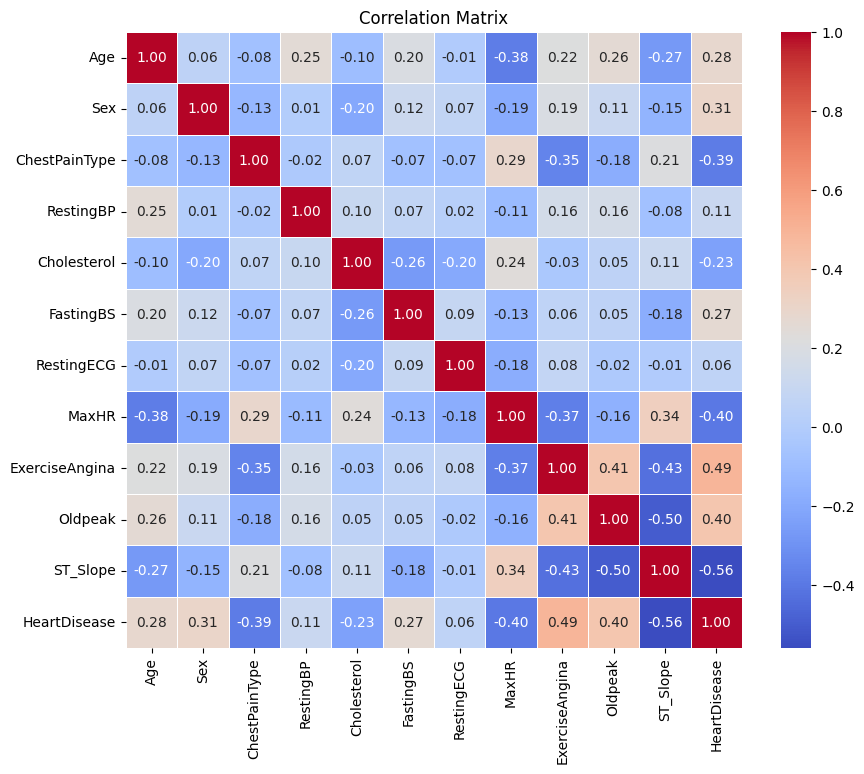

In [22]:
label_encoders = {}
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
# Now, calculate the correlation matrix
corr = df.corr()
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [26]:
# Assume df is your DataFrame and HeartDisease is your target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


training a neural network model and evaluating it

In [41]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Separate features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Define categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("Neural Network Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5495 - loss: 0.6787 - val_accuracy: 0.7132 - val_loss: 0.5849
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7628 - loss: 0.5540 - val_accuracy: 0.7984 - val_loss: 0.5094
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8325 - loss: 0.4768 - val_accuracy: 0.8527 - val_loss: 0.4541
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8411 - loss: 0.4128 - val_accuracy: 0.8527 - val_loss: 0.4184
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8565 - loss: 0.3817 - val_accuracy: 0.8527 - val_loss: 0.3963
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.3644 - val_accuracy: 0.8450 - val_loss: 0.3886
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8562 - loss: 0.3541 - val_accuracy: 0.8527 - val_loss: 0.3766
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.3105 - val_accuracy: 0.8760 - val_loss: 0.3671
Ep

Model Training Progress: Accuracy and Loss Over Epochs

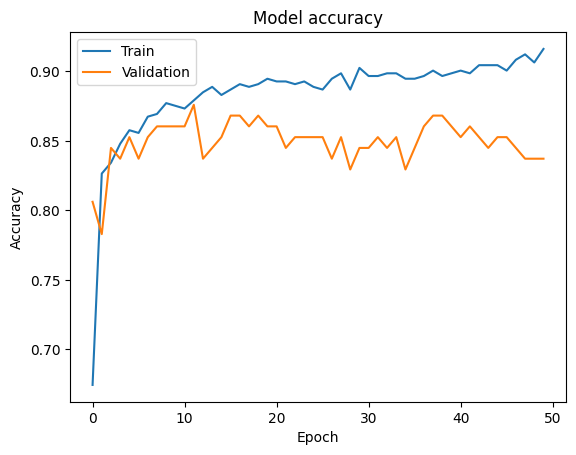

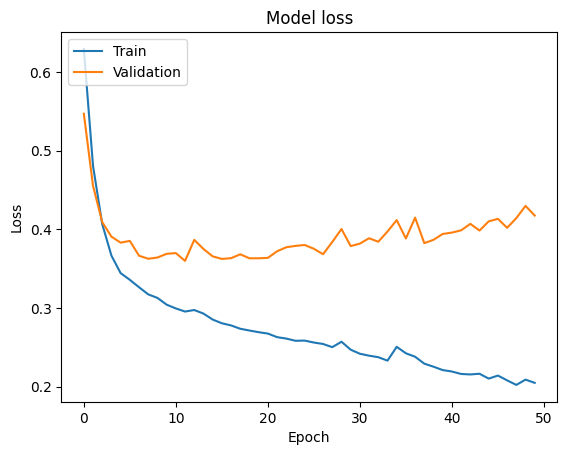

In [67]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Feature Importances from RandomForestClassifier

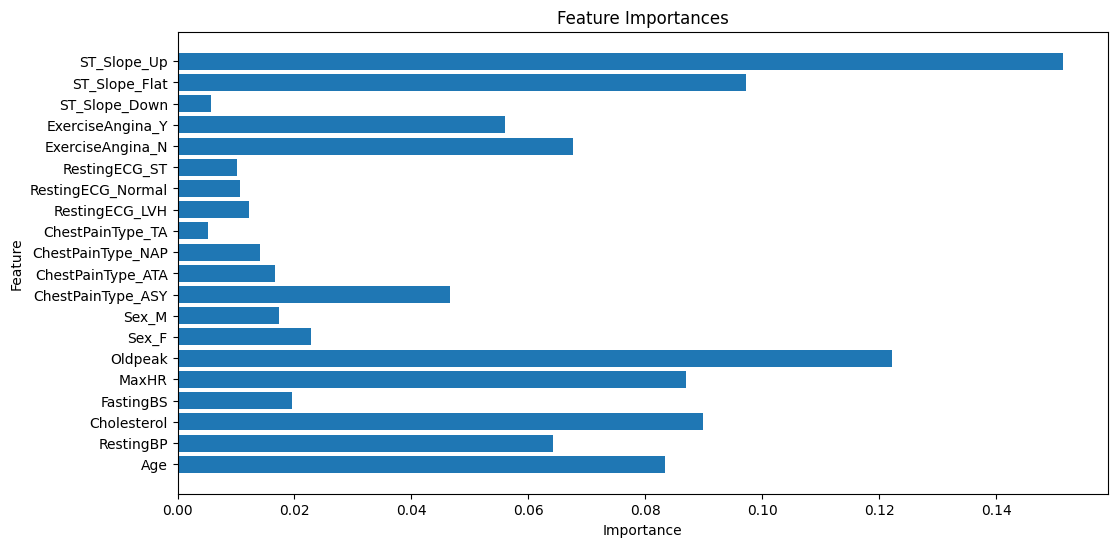

In [73]:


# Load the dataset
df = pd.read_csv('heart.csv')

# Separate features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Define categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out()
all_feature_names = numerical_features + list(categorical_feature_names)

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(all_feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


Grid Search for Hyperparameter Tuning in Neural Network

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the model and parameters for grid search
param_grid = {
    'epochs': [20, 50, 100],
    'batch_size': [16, 32, 64],
    'learning_rate': [0.001, 0.01, 0.1]
}



Cross-Validation Accuracy for MLP Classifier with Pipeline

In [79]:
from sklearn.neural_network import MLPClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, learning_rate_init=0.001, random_state=42))
])

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {scores.mean()} ± {scores.std()}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Accuracy: 0.8049180327868852 ± 0.04027851906580707


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Save the Trained Model to a File

In [81]:
model.save('heart_disease_model.keras')


Load and Use the Saved Model to Make Predictions on New Data

In [93]:
from tensorflow.keras.models import load_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np

# Load the model
model = load_model('heart_disease_model.keras')

# Define preprocessing pipelines
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Load the dataset and fit the preprocessor
df = pd.read_csv('heart.csv')
X = df.drop('HeartDisease', axis=1)
preprocessor.fit(X)

# Define new data
new_data = pd.DataFrame({
    'Age': [50],
    'Sex': ['1'],  # Convert to string
    'ChestPainType': ['2'],  # Convert to string
    'RestingBP': [140],
    'Cholesterol': [250],
    'FastingBS': [0],
    'MaxHR': [150],
    'Oldpeak': [1.5],
    'RestingECG': ['0'],  # Convert to string
    'ExerciseAngina': ['1'],  # Convert to string
    'ST_Slope': ['1']  # Convert to string
})

# Ensure no missing values
print(new_data.isnull().sum())

# Preprocess the new data
new_data_preprocessed = preprocessor.transform(new_data)

# Make predictions
predictions = model.predict(new_data_preprocessed)

# Print predictions
print(predictions)


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
MaxHR             0
Oldpeak           0
RestingECG        0
ExerciseAngina    0
ST_Slope          0
dtype: int64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
[[0.70172304]]


Neural Network Predictions and Evaluation on Flattened Test Data

In [65]:
# Make predictions
y_pred_prob_nn = model.predict(X_test_flat)

# Convert probabilities to binary predictions
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn))
print("Neural Network ROC AUC Score:", roc_auc_score(y_test, y_pred_prob_nn))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       112
           1       0.91      0.88      0.89       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.87       276
weighted avg       0.88      0.88      0.88       276

Neural Network ROC AUC Score: 0.9499673344947736


Neural Network Predictions and Evaluation on Preprocessed Test Data

In [94]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


Neural Network Evaluation Metrics: Confusion Matrix, Classification Report, and ROC AUC Score

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Neural Network Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")


Neural Network Evaluation:
[[ 99  13]
 [ 18 146]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       112
           1       0.92      0.89      0.90       164

    accuracy                           0.89       276
   macro avg       0.88      0.89      0.88       276
weighted avg       0.89      0.89      0.89       276

ROC AUC Score: 0.9514372822299652


RNN Model Training and Evaluation for Heart Disease Prediction

In [48]:
import numpy as np
# Load the dataset
df = pd.read_csv('heart.csv')

# Separate features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Define categorical and numerical columns
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Reshape for RNN (samples, timesteps, features)
X_preprocessed = np.expand_dims(X_preprocessed, axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Build the RNN model with LSTM layers
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
print("RNN Evaluation:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_prob)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6116 - loss: 0.6863 - val_accuracy: 0.7752 - val_loss: 0.6696
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7905 - loss: 0.6591 - val_accuracy: 0.7752 - val_loss: 0.6402
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7948 - loss: 0.6278 - val_accuracy: 0.7984 - val_loss: 0.5918
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8425 - loss: 0.5644 - val_accuracy: 0.8140 - val_loss: 0.5275
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8330 - loss: 0.4950 - val_accuracy: 0.8140 - val_loss: 0.4737
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8283 - loss: 0.4520 - val_accuracy: 0.8450 - val_loss: 0.4360
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8359 - loss: 0.4074 - val_accuracy: 0.8372 - val_loss: 0.4100
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8472 - loss: 0.3824 - val_accuracy: 0.8450 - val_loss

Saving and Loading the RNN Model for Future Use

In [96]:
# Save the model
model.save('heart_disease_rnn.keras')

# Load the model (for future use)
from keras.models import load_model
loaded_model = load_model('heart_disease_rnn.keras')


Visualizing Model Performance: Accuracy and Loss Curves

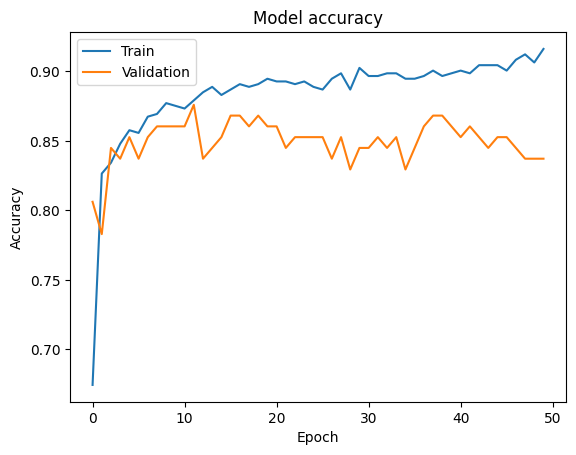

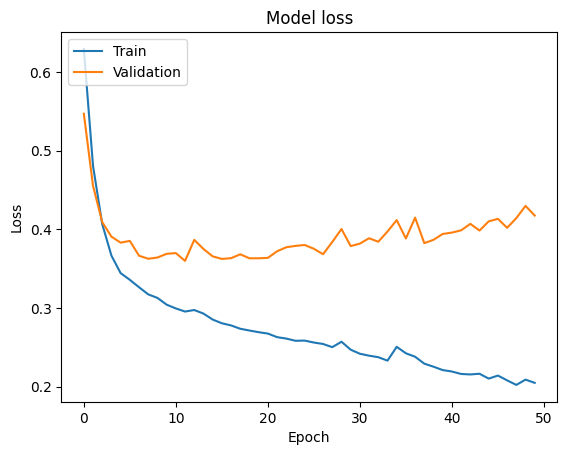

In [97]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Creating an RNN Model Function for Reusability

In [107]:
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



Cross-Validation for RNN Model Performance Evaluation

In [108]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

for train_index, val_index in kf.split(X_preprocessed):
    X_train_cv, X_val_cv = X_preprocessed[train_index], X_preprocessed[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]

    # Reshape data for LSTM
    X_train_cv = np.expand_dims(X_train_cv, axis=1)  # Add timestep dimension
    X_val_cv = np.expand_dims(X_val_cv, axis=1)      # Add timestep dimension

    # Determine the input shape for the model
    input_shape = (X_train_cv.shape[1], X_train_cv.shape[2])

    # Create and train the model
    model = create_model(input_shape=input_shape)
    model.fit(X_train_cv, y_train_cv, epochs=50, batch_size=32, validation_data=(X_val_cv, y_val_cv), verbose=1)

    # Evaluate the model
    scores = model.evaluate(X_val_cv, y_val_cv, verbose=0)
    cv_results.append(scores[1])  # Append accuracy score

print(f"Cross-Validation Accuracy: {np.mean(cv_results)} ± {np.std(cv_results)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.5624 - loss: 0.6875 - val_accuracy: 0.7446 - val_loss: 0.6657
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7788 - loss: 0.6473 - val_accuracy: 0.7935 - val_loss: 0.6109
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8017 - loss: 0.5772 - val_accuracy: 0.8261 - val_loss: 0.5111
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8239 - loss: 0.4801 - val_accuracy: 0.8424 - val_loss: 0.4238
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8556 - loss: 0.3967 - val_accuracy: 0.8315 - val_loss: 0.3930
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8654 - loss: 0.3562 - val_accuracy: 0.8478 - val_loss: 0.3774
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8600 - loss: 0.3649 - val_accuracy: 0.8587 - val_loss: 0.3685
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8770 - loss: 0.3331 - val_accuracy: 0.8587 - val_loss

Retraining the RNN Model on the Full Dataset

In [111]:
# Retrain the model on the full dataset
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Reshape for LSTM
X_train_final = np.expand_dims(X_train_final, axis=1)
X_test_final = np.expand_dims(X_test_final, axis=1)

# Define the input shape
input_shape = (X_train_final.shape[1], X_train_final.shape[2])

# Create the model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(32, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model_final = create_model(input_shape=input_shape)
history_final = model_final.fit(X_train_final, y_train_final, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.5596 - loss: 0.6927 - val_accuracy: 0.8295 - val_loss: 0.6795
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7941 - loss: 0.6732 - val_accuracy: 0.8372 - val_loss: 0.6572
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8079 - loss: 0.6442 - val_accuracy: 0.8372 - val_loss: 0.6193
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8440 - loss: 0.5957 - val_accuracy: 0.8372 - val_loss: 0.5586
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8353 - loss: 0.5289 - val_accuracy: 0.8450 - val_loss: 0.4924
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8115 - loss: 0.4769 - val_accuracy: 0.8450 - val_loss: 0.4424
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8272 - loss: 0.4210 - val_accuracy: 0.8450 - val_loss: 0.4157
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8559 - loss: 0.3776 - val_accuracy: 0.8450 - val_los

Final Model Evaluation Metrics for Heart Disease Prediction

In [112]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Make predictions on the test data
y_pred_prob_final = model_final.predict(X_test_final)
y_pred_final = (y_pred_prob_final > 0.5).astype(int)

# Evaluate the model
print("Final Model Evaluation:")
print(confusion_matrix(y_test_final, y_pred_final))
print(classification_report(y_test_final, y_pred_final))
print(f"ROC AUC Score: {roc_auc_score(y_test_final, y_pred_prob_final)}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 141ms/step
Final Model Evaluation:
[[ 97  15]
 [ 18 146]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.91      0.89      0.90       164

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

ROC AUC Score: 0.9505662020905924


Saving the Final RNN Model for Deployment

In [113]:
model_final.save('heart_disease_model_final.keras')


Loading the Final Model and Making Predictions on New Data

In [114]:
# Load the model
from keras.models import load_model

model_final = load_model('heart_disease_model_final.keras')

# Prepare new data (ensure it follows the same preprocessing steps)
# new_data = ...

# Preprocess new data
new_data_preprocessed = preprocessor.transform(new_data)
new_data_preprocessed = np.expand_dims(new_data_preprocessed, axis=1)

# Make predictions
predictions = model_final.predict(new_data_preprocessed)

# Convert probabilities to binary predictions
predictions_binary = (predictions > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
